<a href="https://colab.research.google.com/github/Vigneshprabhu078/Machine_Learning_Projects/blob/main/8_Predicting_Gold_Market_Trends_A_Random_Forest_Approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Gold Price Prediction Using Random Forest: A Machine Learning Perspective** -Vignesh Prabhu

Predicting gold prices is challenging due to various influencing factors. This project uses Random Forest Regression, a machine learning technique, to forecast gold prices. By analyzing historical data and economic indicators, we aim to create an accurate and reliable model to assist investors and analysts in making informed decisions.

**Import Dependencies**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

**Data Collection And Preprocessing**

In [2]:
#Load data into Dataframe
gold_data=pd.read_csv("/content/Gold_Price.csv")

In [3]:
#to print First 5 rows
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
#To check information
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [5]:
#to Check rows and columns
gold_data.shape

(2290, 6)

In [6]:
#To check statistical Values
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [7]:
# To check Any Null values in dataset
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

**Correlation**

In [12]:


# Assuming 'gold_data' is your DataFrame
# Convert the date column to datetime objects
gold_data['Date'] = pd.to_datetime(gold_data['Date'])  # Replace 'Date' with the actual column name

# Extract numerical features from the datetime object if needed
gold_data['Year'] = gold_data['Date'].dt.year
gold_data['Month'] = gold_data['Date'].dt.month
gold_data['Day'] = gold_data['Date'].dt.day

# Now calculate the correlation
correlation = gold_data.corr()


<Axes: >

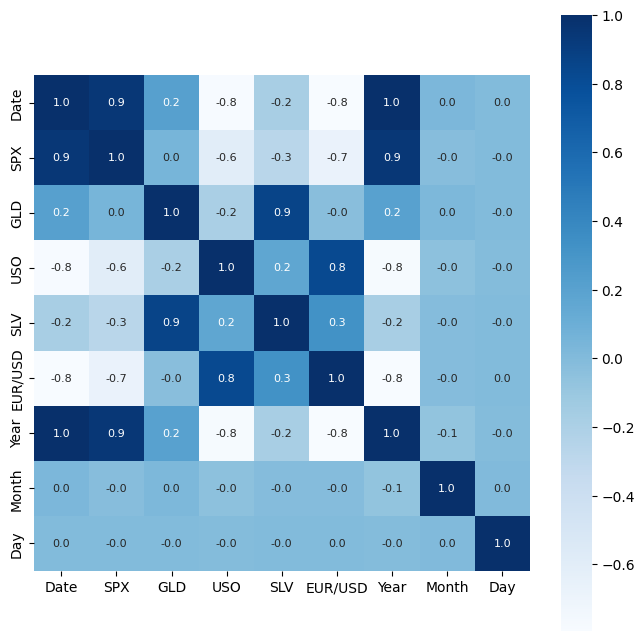

In [13]:
#HeatMap
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [14]:
#correlation Of GLD
print(correlation['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Year       0.206654
Month      0.020494
Day       -0.000198
Name: GLD, dtype: float64


<ipython-input-16-7518d28b8e5b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color='red')


<Axes: xlabel='GLD', ylabel='Density'>

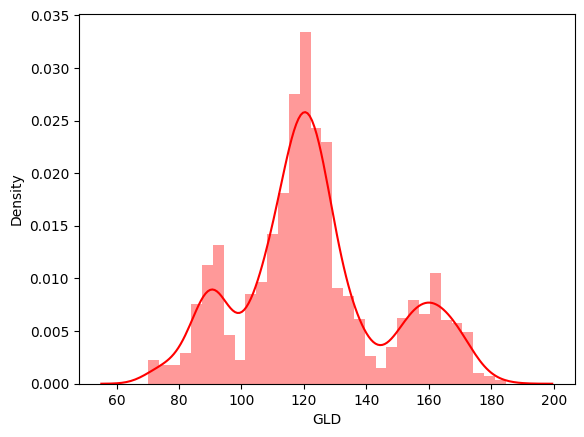

In [16]:
#distribution of gold price
sns.distplot(gold_data['GLD'], color='red')

**Spliting Features and Target**

In [17]:
X=gold_data.drop(['Date','GLD'],axis=1)
Y=gold_data['GLD']

In [19]:
print(X)


              SPX        USO      SLV   EUR/USD  Year  Month  Day
0     1447.160034  78.470001  15.1800  1.471692  2008      1    2
1     1447.160034  78.370003  15.2850  1.474491  2008      1    3
2     1411.630005  77.309998  15.1670  1.475492  2008      1    4
3     1416.180054  75.500000  15.0530  1.468299  2008      1    7
4     1390.189941  76.059998  15.5900  1.557099  2008      1    8
...           ...        ...      ...       ...   ...    ...  ...
2285  2671.919922  14.060000  15.5100  1.186789  2018      5    8
2286  2697.790039  14.370000  15.5300  1.184722  2018      5    9
2287  2723.070068  14.410000  15.7400  1.191753  2018      5   10
2288  2730.129883  14.380000  15.5600  1.193118  2018      5   14
2289  2725.780029  14.405800  15.4542  1.182033  2018      5   16

[2290 rows x 7 columns]


In [20]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


**Spliting Into Training And Test data**

In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [23]:
print(X.shape,X_train.shape,X_test.shape)

(2290, 7) (1832, 7) (458, 7)


**Model training**

In [25]:
regressor=RandomForestRegressor(n_estimators=100) #default Number

In [26]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

**Model Evaluation**

In [27]:
#prediction on test Data
test_data_prediction=regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

In [29]:
#R squarred Error
Error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R squarred Error : ",Error_score)

R squarred Error :  0.9954394762121126


**Compare Actual values and Predicted values**

In [30]:
Y_test=list(Y_test)

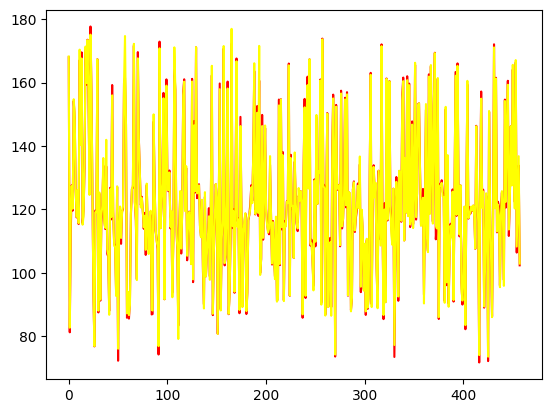

In [33]:
plt.plot(Y_test,color='red',label='Actual Value')
plt.plot(test_data_prediction,color='yellow',label='Predicted Value')

This project used Random Forest Regression to predict gold prices, achieving high accuracy by leveraging historical data and economic indicators. The model's effectiveness highlights the potential of machine learning in financial forecasting, offering valuable insights for investors and analysts.



# **Thank You!**